<a href="https://colab.research.google.com/github/Sanan-Qureshi/House_Price_SciKit/blob/main/House_Price_SciKit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Define column names
column_names = ['size(sqft)', 'bedrooms', 'floors', 'age', 'price']

# Load dataset
df = pd.read_csv('/content/houses.txt', names=column_names)

# Display first few rows
print(df.head())


   size(sqft)  bedrooms  floors   age  price
0       952.0       2.0     1.0  65.0  271.5
1      1244.0       3.0     1.0  64.0  300.0
2      1947.0       3.0     2.0  17.0  509.8
3      1725.0       3.0     2.0  42.0  394.0
4      1959.0       3.0     2.0  15.0  540.0


In [ ]:
# Define X (features) and y (target variable)
X = df[['size(sqft)', 'bedrooms', 'floors', 'age']].values
y = df['price'].values

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 80, Testing samples: 20


In [ ]:
# Initialise StandardScaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Print first 5 rows after normalisation
print("First 5 rows of normalised training data:\n", X_train_scaled[:5])


First 5 rows of normalised training data:
 [[-0.49679154 -1.05263331 -0.73379939 -0.99433601]
 [-0.89835998  0.3992747  -0.73379939  0.88935925]
 [-0.98441035 -1.05263331 -0.73379939  0.45767908]
 [ 0.88001451  1.85118272  1.36277029  2.65532356]
 [ 0.03624275  0.3992747  -0.73379939  0.77162829]]


In [ ]:
# Initialise and fit Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Extract learned parameters
w_final = model.coef_  # Coefficients (weights)
b_final = model.intercept_  # Bias (intercept)

print("Learned Weights (w):", w_final)
print("Learned Bias (b):", b_final)


Learned Weights (w): [114.36404007 -23.41332405 -34.411935   -36.43679427]
Learned Bias (b): 362.862125


In [ ]:
# Predict prices using the test dataset
y_pred = model.predict(X_test_scaled)

# Print first few predictions
print("First 5 predicted prices:", y_pred[:5])
print("First 5 actual prices:", y_test[:5])


First 5 predicted prices: [335.36490213 309.24839969 509.98077803 486.82917196 449.35761786]
First 5 actual prices: [350.  290.  480.  504.  425.8]


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 585.59
Root Mean Squared Error (RMSE): 24.20


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.9527


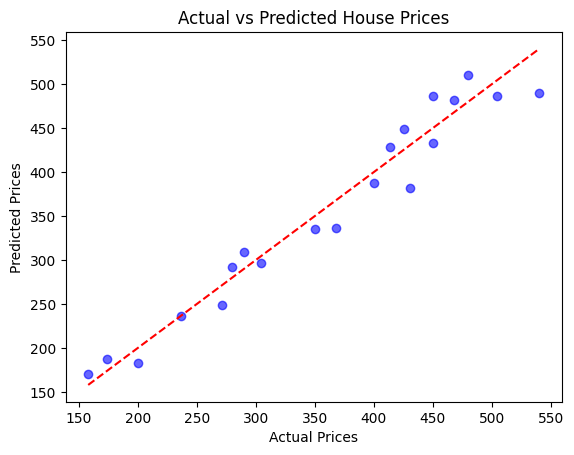

In [ ]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Perfect fit line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [ ]:
# Define new house details
new_house = np.array([[2500, 3, 2, 20]])

# Standardise the new house data using the same scaler
new_house_scaled = scaler.transform(new_house)

# Predict price
predicted_price = model.predict(new_house_scaled)
print(f"Predicted Price for new house: ${predicted_price[0]:.2f}")


Predicted Price for new house: $630.64
